In [4]:
import pandas as pd
import numpy as np

In [5]:
def read_data(path,index_col:int) -> pd.DataFrame:
  try:
    with open(path) as f:
      df = pd.read_csv(path,index_col=index_col)
      return df
  except (FileNotFoundError,FileExistsError) as e:
    print({e})

In [6]:
df = read_data("/content/airlines_flights_data.csv",index_col=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [8]:
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
224792,Air_India,AI-636,Delhi,Afternoon,one,Early_Morning,Chennai,Business,16.17,47,45257
251982,Vistara,UK-816,Bangalore,Morning,one,Night,Mumbai,Business,10.50,39,74844
214536,Air_India,AI-887,Delhi,Early_Morning,one,Evening,Bangalore,Business,11.50,33,42457
158474,Air_India,AI-541,Hyderabad,Evening,zero,Evening,Delhi,Economy,2.25,49,2696
990,Vistara,UK-637,Delhi,Evening,one,Morning,Mumbai,Economy,18.33,7,9105


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
df.value_counts("stops")

,count
stops,
one,250863
zero,36004
two_or_more,13286


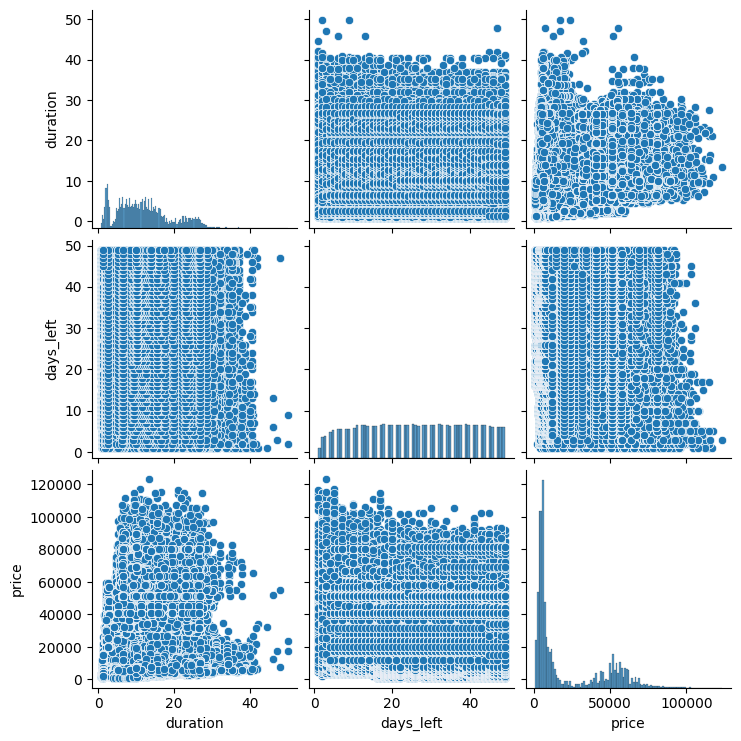

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

In [12]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [13]:
# Data Transformation
for col in df.select_dtypes(object):
  if isinstance(df[col].dtype,object):
    print(df[col].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
destination_city


In [14]:
categorical_features = ['airline','source_city', 'departure_time',
       'arrival_time', 'destination_city', 'class']
numerical_features = ['duration', 'days_left','stops']
target = ["price"]

In [15]:
# One hot encode our categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# sparse_out = False allows us to get a dataframe output
# handle_unknown = 'ignore' is importnt so that new data are considered in during production

ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
transform_data = ColumnTransformer(transformers=[('onehot',ohe,categorical_features)],
                                   remainder='passthrough')
# passthrough indicates that there will be other features which not be one hot encoded

In [16]:
#
data = transform_data.fit_transform(df)

In [17]:
features = transform_data.get_feature_names_out()
df_encoded = pd.DataFrame(data,columns=features)
df_encoded

,onehot__airline_AirAsia,onehot__airline_Air_India,onehot__airline_GO_FIRST,onehot__airline_Indigo,onehot__airline_SpiceJet,onehot__airline_Vistara,onehot__source_city_Bangalore,onehot__source_city_Chennai,onehot__source_city_Delhi,onehot__source_city_Hyderabad,...,onehot__destination_city_Hyderabad,onehot__destination_city_Kolkata,onehot__destination_city_Mumbai,onehot__class_Business,onehot__class_Economy,remainder__flight,remainder__stops,remainder__duration,remainder__days_left,remainder__price
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,SG-8709,zero,2.17,1,5953
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,SG-8157,zero,2.33,1,5953
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,I5-764,zero,2.17,1,5956
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,UK-995,zero,2.25,1,5955
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,UK-963,zero,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,UK-822,one,10.08,49,69265
300149,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,UK-826,one,10.42,49,77105
300150,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,UK-832,one,13.83,49,79099
300151,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,UK-828,one,10.0,49,81585


In [18]:
df_encoded.columns = df_encoded.columns.str.replace("onehot__","")
df_encoded.columns = df_encoded.columns.str.replace("remainder__","")

In [19]:
df_encoded

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,flight,stops,duration,days_left,price
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,SG-8709,zero,2.17,1,5953
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,SG-8157,zero,2.33,1,5953
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,I5-764,zero,2.17,1,5956
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,UK-995,zero,2.25,1,5955
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,UK-963,zero,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,UK-822,one,10.08,49,69265
300149,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,UK-826,one,10.42,49,77105
300150,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,UK-832,one,13.83,49,79099
300151,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,UK-828,one,10.0,49,81585


In [20]:
df_encoded.drop(["flight"],axis=1,inplace=True)

In [21]:
mapping = {"zero": 0, "one": 1, "two_or_more": 2}
df_encoded['stops'] = df_encoded['stops'].map(mapping)

In [22]:
df_encoded

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,stops,duration,days_left,price
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,2.17,1,5953
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,2.33,1,5953
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,2.17,1,5956
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,2.25,1,5955
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,10.08,49,69265
300149,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,10.42,49,77105
300150,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,13.83,49,79099
300151,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,10.0,49,81585


In [23]:
'flight' in df_encoded.columns

False

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [25]:
X = df_encoded.drop(["price"],axis=1)
y = df_encoded["price"]

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
model = RandomForestRegressor(random_state=42)

In [29]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn import metrics

print("Mean squared error (MSE) =", metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE) =", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Square =", metrics.root_mean_squared_error(y_test, y_pred))

Mean squared error (MSE) = 7815751.980509151
Mean absolute error (MAE) = 1092.8474293803263
Root Mean Square = 2795.666643308739
